 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# read in files with dates parsed and datetime properly formatted
whale_returns = pd.read_csv("Resources/whale_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns = pd.read_csv("Resources/algo_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
spy_close = pd.read_csv("Resources/sp500_history.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [6]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [7]:
# Check Data Types
spy_close.dtypes

Close    object
dtype: object

In [8]:
# Fix Data Types
spy_close["Close"] = spy_close["Close"].str.replace("$", "")
spy_close["Close"] = spy_close["Close"].astype("float")
spy_close.dtypes

<ipython-input-8-82796afb9782>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  spy_close["Close"] = spy_close["Close"].str.replace("$", "")


Close    float64
dtype: object

In [9]:
# Calculate Daily Returns
spy_returns = spy_close.pct_change()

In [10]:
# Drop nulls
spy_returns.dropna(inplace=True)

In [11]:
# Rename `Close` Column to be specific to this portfolio.
spy_returns.rename(columns={"Close": "S&P 500"}, inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [12]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
compare_returns_df = pd.concat([whale_returns, algo_returns, spy_returns], axis= "columns", join="inner")

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Compared Daily Returns'}, xlabel='Date'>

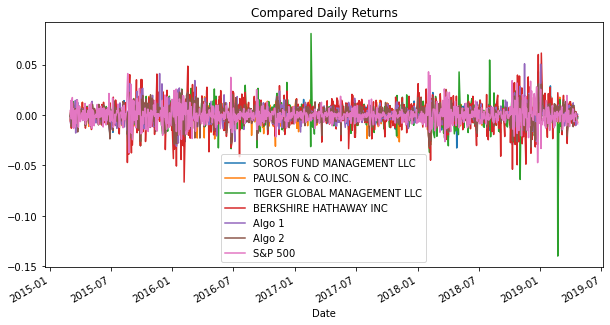

In [13]:
# Plot daily returns of all portfolios
compare_returns_df.plot(figsize=(10,5),title="Compared Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Compared Cumulative Returns'}, xlabel='Date'>

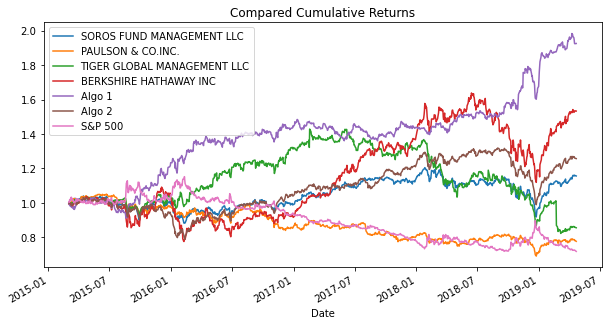

In [14]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+compare_returns_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5), title="Compared Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

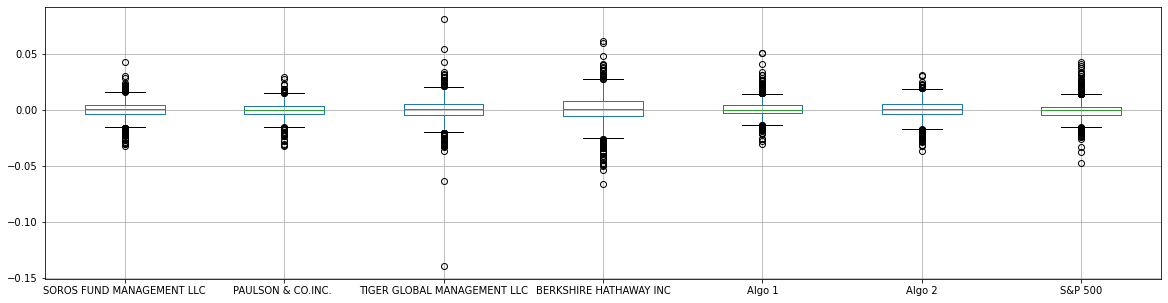

In [15]:
# Box plot to visually show risk
compare_returns_df.boxplot(figsize=(20,5))


### Calculate Standard Deviations

In [16]:
# Calculate the daily standard deviations of all portfolios
daily_std = compare_returns_df.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [17]:
# Calculate  the daily standard deviation of S&P 500
spy_daily_std = compare_returns_df["S&P 500"].std()
spy_daily_std
# Determine which portfolios are riskier than the S&P 500
#BH & Tiger Global are more risky, consider for loop to print these


0.00858688974707399

### Calculate the Annualized Standard Deviation

In [18]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21D Rolling StDev'}, xlabel='Date'>

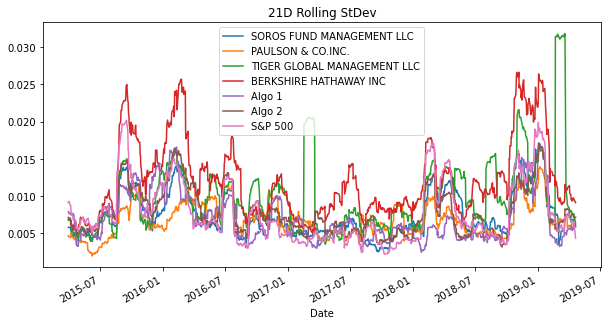

In [19]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
compare_returns_df.rolling(window=21).std().plot(figsize=(10,5), title="21D Rolling StDev")

### Calculate and plot the correlation

<AxesSubplot:>

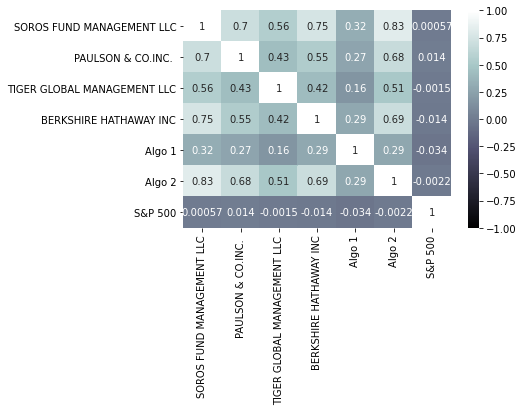

In [20]:
# Calculate the correlation
correlation = compare_returns_df.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="bone")

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'60D Rolling Beta'}, xlabel='Date'>

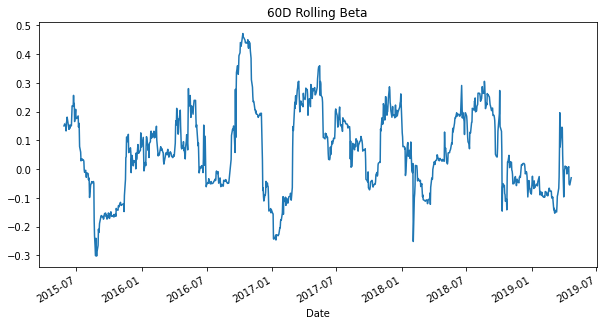

In [21]:
# Calculate covariance of a single portfolio compare_returns_df.rolling(window=21).std()
algo2_roll_cov = compare_returns_df["Algo 2"].rolling(window=60).cov(compare_returns_df["S&P 500"])
# Calculate variance of S&P 500
roll_var = compare_returns_df["S&P 500"].rolling(window=60).var()
# Computing beta & Plot beta trend
algo2_beta = algo2_roll_cov/roll_var
algo2_beta.dropna(inplace=True)
algo2_beta.plot(figsize=(10,5), title="60D Rolling Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [22]:
# Use `ewm` to calculate the rolling window
times = []
times = compare_returns_df.index
compare_returns_df["Algo 2"].ewm(halflife="21 days", times=pd.DatetimeIndex(times)).mean()

Date
2015-03-03   -0.000949
2015-03-04    0.000761
2015-03-05    0.001988
2015-03-06   -0.001542
2015-03-09   -0.000903
                ...   
2019-04-15    0.001365
2019-04-16    0.001437
2019-04-17    0.001132
2019-04-18    0.001025
2019-04-22    0.000880
Name: Algo 2, Length: 1042, dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [23]:
# Annualized Sharpe Ratios compare df is daily
sharpe_ratio = compare_returns_df.mean()/compare_returns_df.std()

<AxesSubplot:>

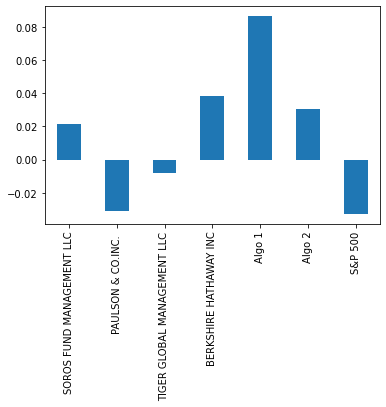

In [24]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Both algorithmic portfolios outperform the SP500 and the whales portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [25]:
# Reading data from 1st, 2nd, 3rd stock ( Reset Date index done here)
amat_data = pd.read_csv("Resources/amat_data.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
amd_data = pd.read_csv("Resources/amd_data.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
tsla_data = pd.read_csv("Resources/tsla_data.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
amat_data.drop(columns=["Volume","Open", "High", "Low"], inplace=True)
amd_data.drop(columns=["Volume","Open", "High", "Low"], inplace=True)
tsla_data.drop(columns=["Volume","Open", "High", "Low"], inplace=True)

In [26]:
amat_data["Close/Last"]= amat_data["Close/Last"].str.replace("$","").astype("float")
amd_data["Close/Last"] = amd_data["Close/Last"].str.replace("$","").astype("float")
tsla_data["Close/Last"] = tsla_data["Close/Last"].str.replace("$","").astype("float")

<ipython-input-26-7005f065f5ec>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  amat_data["Close/Last"]= amat_data["Close/Last"].str.replace("$","").astype("float")
<ipython-input-26-7005f065f5ec>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  amd_data["Close/Last"] = amd_data["Close/Last"].str.replace("$","").astype("float")
<ipython-input-26-7005f065f5ec>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  tsla_data["Close/Last"] = tsla_data["Close/Last"].str.replace("$","").astype("float")


In [27]:
#spy_returns.rename(columns={"Close": "S&P 500"}, inplace=True)
amat_data.rename(columns={"Close/Last": "AMAT"}, inplace=True)
amd_data.rename(columns={"Close/Last": "AMD"}, inplace=True)
tsla_data.rename(columns={"Close/Last": "TSLA"}, inplace=True)

In [28]:
# Combine all stocks in a single DataFrame (reorganize portfolio data by having a column per symbol)
custom_port = pd.concat([amat_data, amd_data, tsla_data], axis= "columns", join="inner")
custom_port.sort_index(inplace=True)

In [29]:
# Reorganize portfolio data by having a column per symbol
custom_port

,AMAT,AMD,TSLA
Date,,,
2020-04-13,49.88,50.94,130.190
2020-04-14,52.47,54.93,141.978
2020-04-15,50.37,54.99,145.966
2020-04-16,52.23,56.95,149.042
2020-04-17,53.20,56.60,150.778
...,...,...,...
2021-04-05,143.05,81.43,691.050
2021-04-06,139.54,81.44,691.620
2021-04-07,139.14,82.20,670.970


In [47]:
# Calculate daily returns & drop NAs
custom_returns = custom_port.pct_change().dropna()
# Display sample data
custom_returns

,AMAT,AMD,TSLA
Date,,,
2020-04-14,0.051925,0.078327,0.090545
2020-04-15,-0.040023,0.001092,0.028089
2020-04-16,0.036927,0.035643,0.021073
2020-04-17,0.018572,-0.006146,0.011648
2020-04-20,-0.048308,0.006537,-0.009988
...,...,...,...
2021-04-05,0.010811,0.004193,0.044277
2021-04-06,-0.024537,0.000123,0.000825
2021-04-07,-0.002867,0.009332,-0.029857


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [48]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
custom_returns = custom_returns.dot(weights)
columns = [""]
custom_returns = custom_returns.rename({"": "custom"}, axis="columns")
# Display sample data
custom_returns.head()

Date
2020-04-14    0.073599
2020-04-15   -0.003614
2020-04-16    0.031214
2020-04-17    0.008025
2020-04-20   -0.017253
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [50]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([custom_returns, compare_returns_df], axis= "columns", join="outer")

In [51]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# all_returns.dropna(inplace=True) when this op is completed there is no data, because most dates don't intersect

all_returns

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2015-03-03,NaN,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,NaN,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,NaN,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,NaN,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,NaN,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...,...
2021-04-05,0.019760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-06,-0.007863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-07,-0.007797,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [34]:
# Calculate the annualized `std`
# all_std = all_returns.std() * np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

In [36]:
# Calculate rolling standard deviation & Plot rolling standard deviation
#all_returns.rolling(window=21).std()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
Date,,,,,,,,


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation
# all_returns.corr().plot(figsize=(10,5), title="All Returns Correlation")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta
"""
custom_roll_cov = compare_returns_df["custom"].rolling(window=60).cov(compare_returns_df["S&P 500"])
custom_beta = custom_roll_cov/roll_var
custom_beta.dropna(inplace=True)
custom_beta.plot(figsize=(10,5), title="60D Rolling Beta")

"""

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios
#sharpe_ratio_all = all_returns.mean()/all_returns.std()

In [ ]:
# Visualize the sharpe ratios as a bar plot
# sharpe_ratio_all.plot(kind=bar, figsize=(20,5))

### How does your portfolio do?

I cannot answer this question for the data i pulled since the dates do not line up with the data (we were asked to pull for a year)